**Chapter 7 – Ensemble Learning and Random Forests**

_This notebook contains all the sample code and solutions to the exercises in chapter 7._

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/UAPH4582/PH482_582/blob/main/04_Random_Forests.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20.

In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ensembles"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

In [2]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.hot,
               interpolation="nearest")
    plt.axis("off")

In [3]:
def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

In [4]:
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

# Voting classifiers

In [5]:
heads_proba = 0.51
coin_tosses = (np.random.rand(10000, 10) < heads_proba).astype(np.int32)
cumulative_heads_ratio = np.cumsum(coin_tosses, axis=0) / np.arange(1, 10001).reshape(-1, 1)

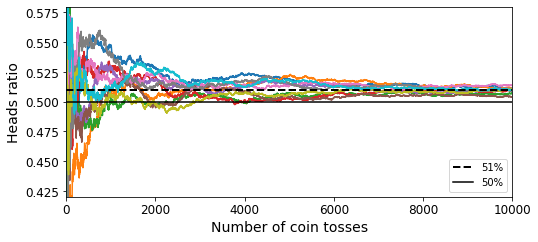

In [6]:
plt.figure(figsize=(8,3.5))
plt.plot(cumulative_heads_ratio)
plt.plot([0, 10000], [0.51, 0.51], "k--", linewidth=2, label="51%")
plt.plot([0, 10000], [0.5, 0.5], "k-", label="50%")
plt.xlabel("Number of coin tosses")
plt.ylabel("Heads ratio")
plt.legend(loc="lower right")
plt.axis([0, 10000, 0.42, 0.58])
plt.show()

### Task 1 
As we did in the last assignment, load the moon dataset with 500 samples, 0.3 for the noise value, and `random_state` to `42` . Also, perform train_test_split on it. 

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

#X, y = 
#X_train, X_test, y_train, y_test = 

**Note**: to be future-proof, we set `solver="lbfgs"`, `n_estimators=100`, and `gamma="scale"` since these will be the default values in upcoming Scikit-Learn versions.

Now, we are going to build a voting classifier with the following estimators: 
    - logistic regression
    - random forest classifier 
    - svc
    
Initialize those four objects with `random_state` parameter equal to `42`. 

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# log_clf = 
# rand_forest_clf = 
# svm_clf = 

# voting_clf = VotingClassifier(
#     estimators=[('lr', ), ('rf', ), ('svc', )],
#     voting='hard')

Finally, fit the voting classifier to your train dataset. 

In [ ]:
# fit here

### Task 2

Now we are going to print out the accuracy scores for each of the classifier above. 

In [ ]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rand_forest_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    # predict the y_test with each classifier 
    #y_pred = 
    # calculate the accuracy score for each
    # classifier_accuracy_score = 
    # finally, we will print them out 
    print(clf.__class__.__name__, classifier_accuracy_score)

### Task 3
Soft voting:
Now  repeat everything in Tasks 1 and 2 but for soft voting. To do that, just change the value in the ```voting``` parameter to `soft` and set the `probability` to `True`.

In [12]:
# fit to a new voting classifier with the 'soft' parameter. 

In [13]:
# calculate the accuracy scores. 

How are the results different?

# Bagging ensembles

### Task 4 

Now, initialize a bagging classifier for a decision tree classifier with the following parameters: 
    - n_estimators = 500
    - max_samples = 100
    - bootstrap = True
    - random_state = 42

In [20]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

#bag_clf = 

Fit the bagging claddifier to the training data and make a prediction. Calculate the accuracy score. 

In [ ]:
# fit the classifier and calculate the prediction. 
# y_pred = 

In [14]:
# bag_clr_accuracy_score = 

Do the same for a Decision Tree Classifier. 

In [15]:
#tree_clf = 

# fit 
# make prediction 
# y_pred_tree = 
# pred_tree_accuracy_score = 

In [ ]:
fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)
plt.sca(axes[1])
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Trees with Bagging", fontsize=14)
plt.ylabel("")
plt.show()

## Feature importance

In [30]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.uint8)

### Task 5
Initialize a random forest classifier with 100 estimators. 
Fit it to mnist["data"] and mnist["target"]

In [14]:
#rand_forest_clf = 
# fit 

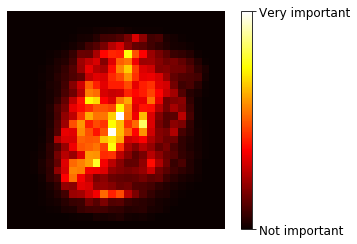

In [36]:
plot_digit(rand_forest_clf.feature_importances_)

cbar = plt.colorbar(ticks=[rand_forest_clf.feature_importances_.min(), rand_forest_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])
plt.show()

What can you infer from the visualization above? 

# AdaBoost

### Task 6
Now, initialize an Ada Boost classifier for a decision tree classifier with the following parameters:
    - max_depth = 1 - Deision Tree classifier parameter
    - n_estimators = 200 - Ada Boost classifier parameter
    - learning_rate = 0.5 - Ada Boost classifier parameter
    - algorithm = "SAMME.R" - Ada Boost classifier parameter
    - random_state = 42 - Ada Boost classifier parameter
    
Fit it to the training data. 

In [37]:
from sklearn.ensemble import AdaBoostClassifier

#ada_clf = 
#fit 

Plot the decision boundary for ada_clf, X, y

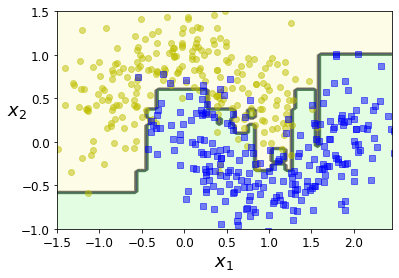

In [31]:
plot_decision_boundary(ada_clf, X, y)

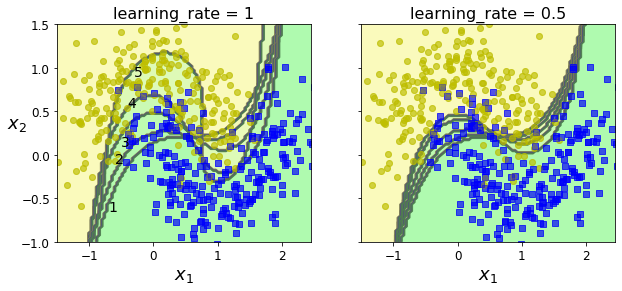

In [39]:
m = len(X_train)

fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)
for subplot, learning_rate in ((0, 1), (1, 0.5)):
    sample_weights = np.ones(m)
    plt.sca(axes[subplot])
    for i in range(5):
        svm_clf = SVC(kernel="rbf", C=0.05, gamma="scale", random_state=42)
        svm_clf.fit(X_train, y_train, sample_weight=sample_weights)
        y_pred = svm_clf.predict(X_train)
        sample_weights[y_pred != y_train] *= (1 + learning_rate)
        plot_decision_boundary(svm_clf, X, y, alpha=0.2)
        plt.title("learning_rate = {}".format(learning_rate), fontsize=16)
    if subplot == 0:
        plt.text(-0.7, -0.65, "1", fontsize=14)
        plt.text(-0.6, -0.10, "2", fontsize=14)
        plt.text(-0.5,  0.10, "3", fontsize=14)
        plt.text(-0.4,  0.55, "4", fontsize=14)
        plt.text(-0.3,  0.90, "5", fontsize=14)
    else:
        plt.ylabel("")

plt.show()

In [ ]:
list(m for m in dir(ada_clf) if not m.startswith("_") and m.endswith("_"))

# Gradient Boosting

In [3]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

### Task 7
In this task, we will be doing the following. 

    1) Initialize a decision tree regressor with `max_depth=2` and `random_state=42`.
    2) Fit it to X and y.
    3) Substract the difference between the predicted y and the actual y. 
    4) Fit the new classifier with the same parameters for the value in step 3. 
    5) repeat this one more time. You should obtain values for y2 and y3. 

In [50]:
from sklearn.tree import DecisionTreeRegressor

#tree_reg1 = 
# fit

In [51]:
#y2 = 
#tree_reg2 = 
#fit to X and y2

In [52]:
#y3 = 
#tree_reg3 = 
#fit to X and y3

In [53]:
X_new = np.array([[0.8]])

The new predicted `y` should be the sum of the predictions for the `X_new` performed bby each tree. 

In [55]:
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))

In [56]:
y_pred

array([0.75026781])

What do plots below show? 

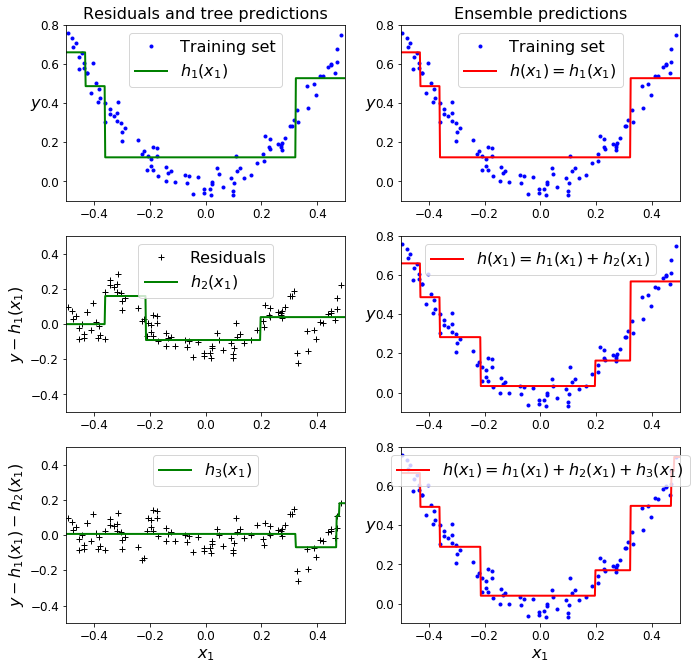

In [58]:
plt.figure(figsize=(11,11))

plt.subplot(321)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h_1(x_1)$", style="g-", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Residuals and tree predictions", fontsize=16)

plt.subplot(322)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1)$", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Ensemble predictions", fontsize=16)

plt.subplot(323)
plot_predictions([tree_reg2], X, y2, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_2(x_1)$", style="g-", data_style="k+", data_label="Residuals")
plt.ylabel("$y - h_1(x_1)$", fontsize=16)

plt.subplot(324)
plot_predictions([tree_reg1, tree_reg2], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1)$")
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.subplot(325)
plot_predictions([tree_reg3], X, y3, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_3(x_1)$", style="g-", data_style="k+")
plt.ylabel("$y - h_1(x_1) - h_2(x_1)$", fontsize=16)
plt.xlabel("$x_1$", fontsize=16)

plt.subplot(326)
plot_predictions([tree_reg1, tree_reg2, tree_reg3], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.show()

We are also going to compare two gradient boosting regressor objects. 
Both with `max_depth=2` and `random_state=42`, but one will be 'fast' and one will be 'slow'. 
For the fast one, set the learning rate to 1 and number of estimators to 3. 
For the slow one, set the learning rate to 0.1 and number of estimators to 200. 

In [60]:
from sklearn.ensemble import GradientBoostingRegressor

#gbrt_fast = 
#gbrt_slow = 

Next, we are fitting them to the data. 

In [ ]:
gbrt_fast.fit(X, y)
gbrt_slow.fit(X, y)

Saving figure gbrt_learning_rate_plot


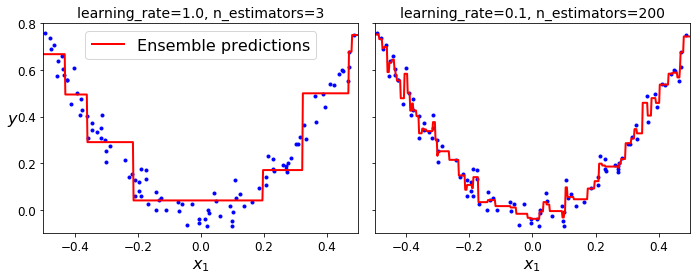

In [44]:
fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)

plt.sca(axes[0])
plot_predictions([gbrt_fast], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="Ensemble predictions")
plt.title("learning_rate={}, n_estimators={}".format(gbrt_fast.learning_rate, gbrt_fast.n_estimators), fontsize=14)
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.sca(axes[1])
plot_predictions([gbrt_slow], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("learning_rate={}, n_estimators={}".format(gbrt_slow.learning_rate, gbrt_slow.n_estimators), fontsize=14)
plt.xlabel("$x_1$", fontsize=16)

plt.show()

## Gradient Boosting with Early stopping

In this section, we are going to be looking for the lowest MSE in a set of boosted trees. Just run the cells below and discuss the results.  

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=49)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=42)
gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_val, y_pred)
          for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors) + 1

gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=bst_n_estimators, random_state=42)
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=56,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [46]:
min_error = np.min(errors)

Saving figure early_stopping_gbrt_plot


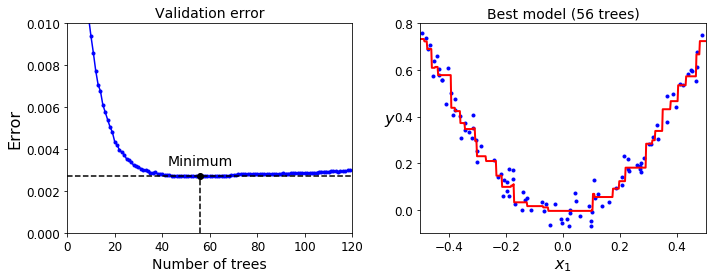

In [47]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.plot(errors, "b.-")
plt.plot([bst_n_estimators, bst_n_estimators], [0, min_error], "k--")
plt.plot([0, 120], [min_error, min_error], "k--")
plt.plot(bst_n_estimators, min_error, "ko")
plt.text(bst_n_estimators, min_error*1.2, "Minimum", ha="center", fontsize=14)
plt.axis([0, 120, 0, 0.01])
plt.xlabel("Number of trees")
plt.ylabel("Error", fontsize=16)
plt.title("Validation error", fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_best], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("Best model (%d trees)" % bst_n_estimators, fontsize=14)
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.xlabel("$x_1$", fontsize=16)

plt.show()

In [48]:
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True, random_state=42)

min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break  # early stopping

In [49]:
print(gbrt.n_estimators)

61


In [50]:
print("Minimum validation MSE:", min_val_error)

Minimum validation MSE: 0.002712853325235463


## Using XGBoost

### Task 8
Finally, we move to an XGBoost regressor - arguably one of the most popular and widely-used algorithms nowadays. 

First, make sure you have it installed. 

In [7]:
try:
    import xgboost
except ImportError as ex:
    print("Error: the xgboost library is not installed.")
    xgboost = None

Error: the xgboost library is not installed.


In [8]:
val_errors_no_stop = []
if xgboost is not None:  # not shown in the book
    xgb_reg = xgboost.XGBRegressor(random_state=42)
    xgb_reg.fit(X_train, y_train)
    y_pred = xgb_reg.predict(X_val)
    val_error = np.sqrt(mean_squared_error(y_val, y_pred)) # Not shown
    val_errors_no_stop.append(val_error)
    print("Validation RMSE:", val_error)           # Not shown

Do the same thing as above but while fitting, add a validation sets and set `early_stopping_rounds=2`. To do taht, you want to add the `eval_set` parameter and set `[(X_val, y_val)]` value there. 

In [65]:
val_errors_with_stop = []
if xgboost is not None:  # not shown in the book
    # fit
    # xgb_reg = 
    # add the validation set and an early stopping. 
    val_errors_with_stop = xgb_reg.evals_result()['validation_0']['rmse']
    y_pred = xgb_reg.predict(X_val)
    val_error = np.sqrt(mean_squared_error(y_val, y_pred))  # Not shown
    val_errors_with_stop.append(val_error)
    print("Validation RMSE:", val_error)            # Not shown

In [ ]:
plt.plot(val_errors_with_stop)
plt.plot([val_errors_no_stop for i in range(len(val_errors_with_stop))])
plt.ylim(-0.1, 0.3)
plt.show()